# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [5]:
df['target'] = wine.target

In [6]:
X = df.drop('target',axis=1)
y = df.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmodel = KMeans(n_clusters=8)

In [10]:
kmodel.fit(X)

KMeans()

In [13]:
silhouette_score(X,labels=kmodel.labels_)

0.5397682873974343

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [14]:
kmodel = KMeans(n_clusters=5)

In [15]:
kmodel.fit(X)

KMeans(n_clusters=5)

In [16]:
silhouette_score(X,labels=kmodel.labels_)

0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [17]:
kmodel = KMeans(n_clusters=3)

In [18]:
kmodel.fit(X)

KMeans(n_clusters=3)

In [19]:
silhouette_score(X,labels=kmodel.labels_)

0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [20]:
from yellowbrick.cluster import KElbowVisualizer


In [29]:
help(KElbowVisualizer)

Help on class KElbowVisualizer in module yellowbrick.cluster.elbow:

class KElbowVisualizer(yellowbrick.cluster.base.ClusteringScoreVisualizer)
 |  KElbowVisualizer(estimator, ax=None, k=10, metric='distortion', timings=True, locate_elbow=True, **kwargs)
 |  
 |  The K-Elbow Visualizer implements the "elbow" method of selecting the
 |  optimal number of clusters for K-means clustering. K-means is a simple
 |  unsupervised machine learning algorithm that groups data into a specified
 |  number (k) of clusters. Because the user must specify in advance what k to
 |  choose, the algorithm is somewhat naive -- it assigns all members to k
 |  clusters even if that is not the right k for the dataset.
 |  
 |  The elbow method runs k-means clustering on the dataset for a range of
 |  values for k (say from 1-10) and then for each value of k computes an
 |  average score for all clusters. By default, the ``distortion`` score is
 |  computed, the sum of square distances from each point to its as

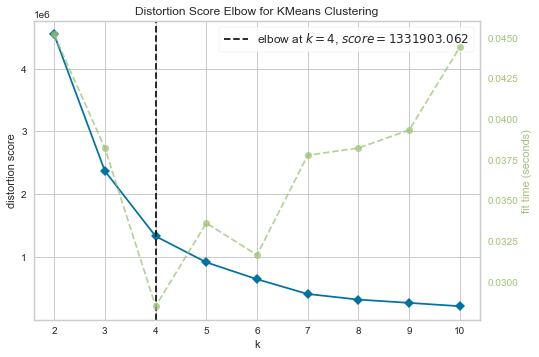

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KElbowVisualizer(estimator=KMeans(),k=10,metric='distortion')
model.fit(X)
model.show()

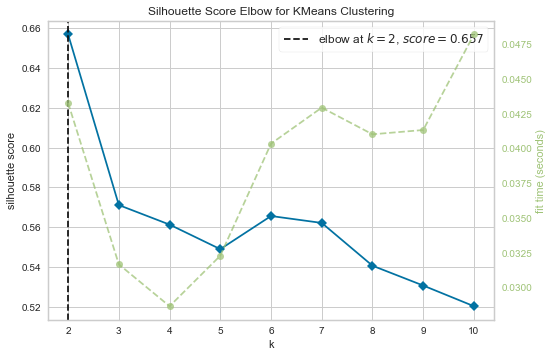

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [33]:
model = KElbowVisualizer(estimator=KMeans(),k=10,metric='silhouette')
model.fit(X)
model.show()

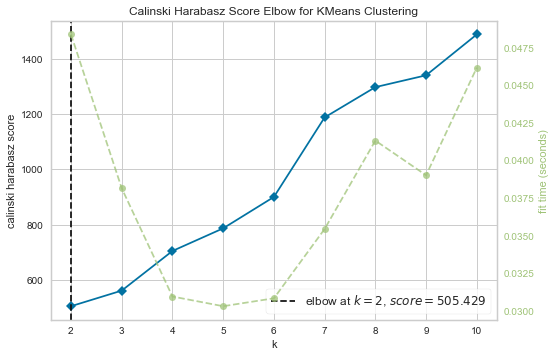

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [35]:
model = KElbowVisualizer(estimator=KMeans(),k=10,metric='calinski_harabasz')
model.fit(X)
model.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [36]:
from sklearn.cluster import AgglomerativeClustering


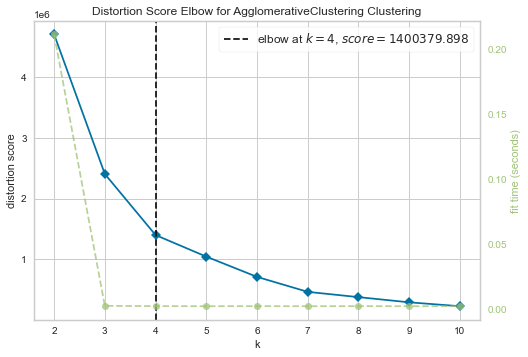

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
model = KElbowVisualizer(estimator=AgglomerativeClustering(),k=10,metric='distortion')
model.fit(X)
model.show()

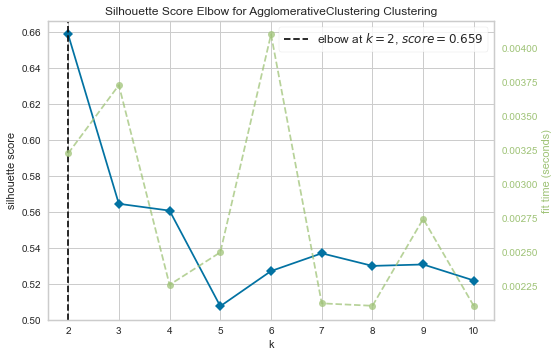

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [38]:
model = KElbowVisualizer(estimator=AgglomerativeClustering(),k=10,metric='silhouette')
model.fit(X)
model.show()

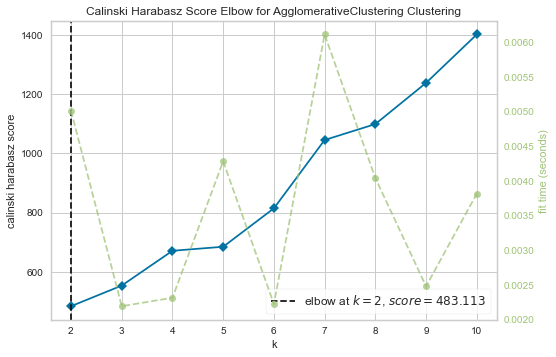

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [39]:
model = KElbowVisualizer(estimator=AgglomerativeClustering(),k=10,metric='calinski_harabasz')
model.fit(X)
model.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [41]:
kmodel = KMeans(n_clusters=2)

In [42]:
kmodel.fit(X)

KMeans(n_clusters=2)

In [43]:
silhouette_score(X,labels=kmodel.labels_)

0.6568536504294317

In [44]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = kmodel.labels_

<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

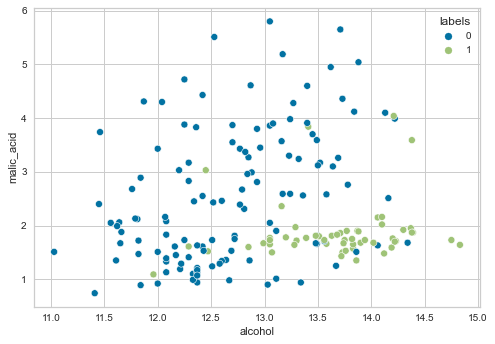

In [55]:
#Primer bin
sns.scatterplot(data=X[bin1], x=X[bin1[0]], y=X[bin1[1]],hue=X.labels)

<AxesSubplot:xlabel='alcohol', ylabel='ash'>

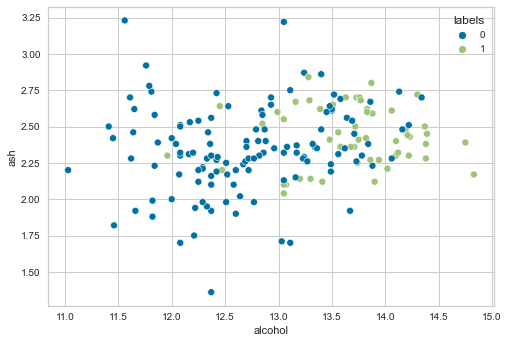

In [56]:
sns.scatterplot(data=X[bin1], x=X[bin1[0]], y=X[bin1[2]],hue=X.labels)

<AxesSubplot:xlabel='malic_acid', ylabel='ash'>

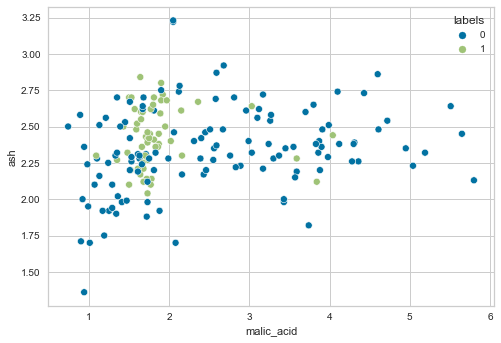

In [57]:
sns.scatterplot(data=X[bin1], x=X[bin1[1]], y=X[bin1[2]],hue=X.labels)

<AxesSubplot:xlabel='alcalinity_of_ash', ylabel='magnesium'>

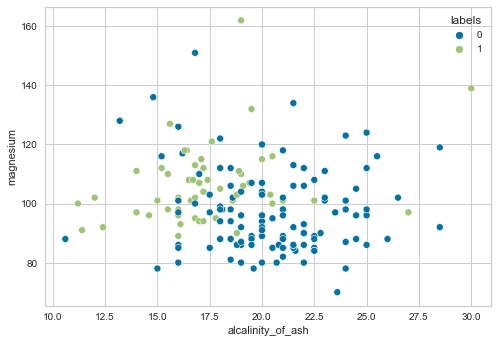

In [58]:
#Segundo bin
sns.scatterplot(data=X[bin2], x=X[bin2[0]], y=X[bin2[1]],hue=X.labels)

<AxesSubplot:xlabel='alcalinity_of_ash', ylabel='total_phenols'>

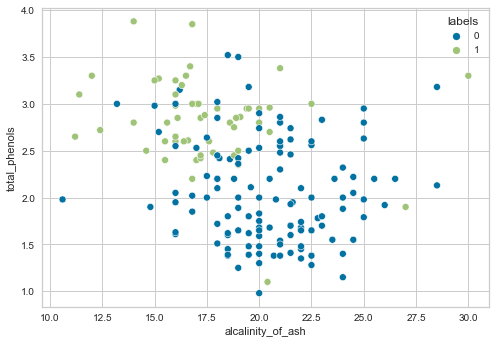

In [59]:
sns.scatterplot(data=X[bin2], x=X[bin2[0]], y=X[bin2[2]],hue=X.labels)

<AxesSubplot:xlabel='magnesium', ylabel='total_phenols'>

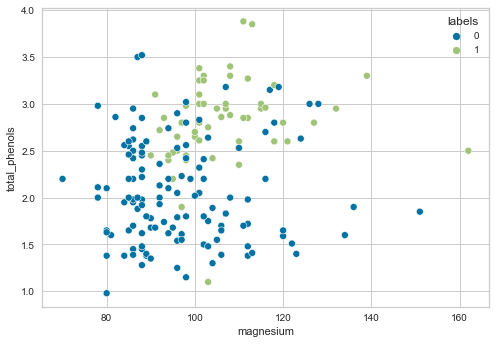

In [62]:
sns.scatterplot(data=X[bin2], x=X[bin2[1]], y=X[bin2[2]],hue=X.labels)

<AxesSubplot:xlabel='flavanoids', ylabel='nonflavanoid_phenols'>

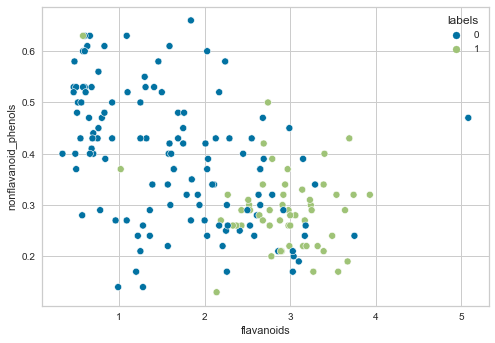

In [63]:
#Tercer bin
sns.scatterplot(data=X[bin3], x=X[bin3[0]], y=X[bin3[1]],hue=X.labels)

<AxesSubplot:xlabel='flavanoids', ylabel='proanthocyanins'>

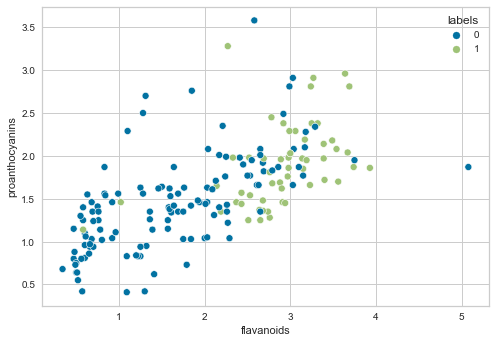

In [64]:
sns.scatterplot(data=X[bin3], x=X[bin3[0]], y=X[bin3[2]],hue=X.labels)

<AxesSubplot:xlabel='nonflavanoid_phenols', ylabel='proanthocyanins'>

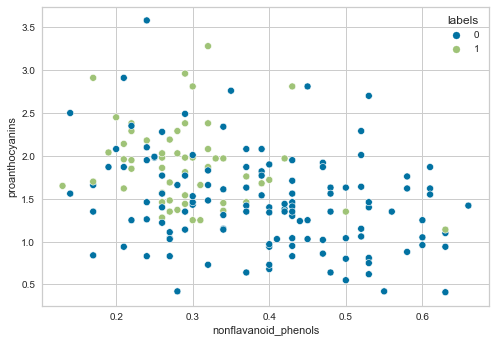

In [67]:
sns.scatterplot(data=X[bin3], x=X[bin3[1]], y=X[bin3[2]],hue=X.labels)

<AxesSubplot:xlabel='color_intensity', ylabel='hue'>

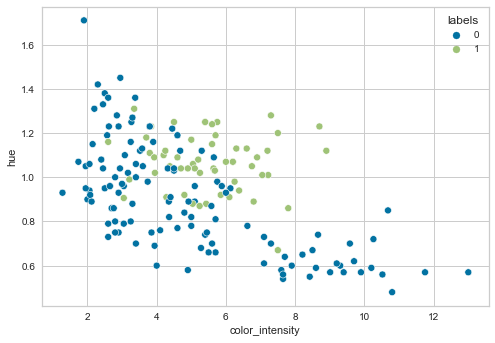

In [68]:
#Cuarto bin
sns.scatterplot(data=X[bin4], x=X[bin4[0]], y=X[bin4[1]],hue=X.labels)

<AxesSubplot:xlabel='color_intensity', ylabel='od280/od315_of_diluted_wines'>

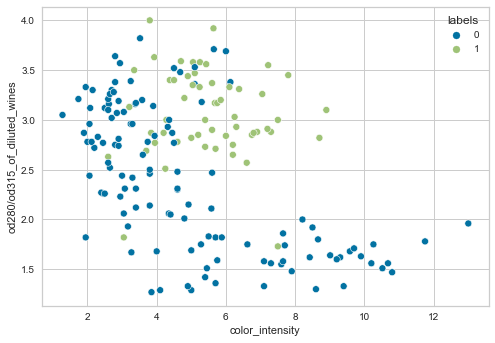

In [69]:
sns.scatterplot(data=X[bin4], x=X[bin4[0]], y=X[bin4[2]],hue=X.labels)

<AxesSubplot:xlabel='hue', ylabel='od280/od315_of_diluted_wines'>

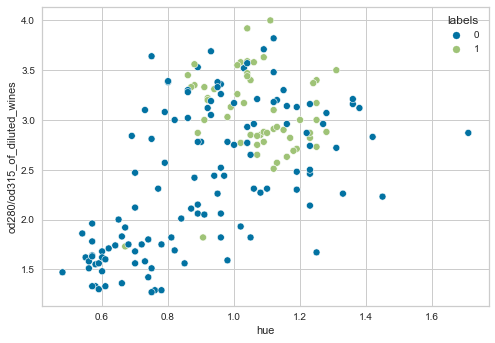

In [70]:
sns.scatterplot(data=X[bin4], x=X[bin4[1]], y=X[bin4[2]],hue=X.labels)

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [71]:
from sklearn.decomposition import PCA

In [72]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [74]:
model = PCA(n_components=2)

In [76]:
PCA_arr = model.fit_transform(X)

In [102]:
PCA_1 = []
PCA_2 = []
for i in PCA_arr:
    PCA_1.append(i[0])
    PCA_2.append(i[1])

In [104]:
X['PCA_1'] = PCA_1
X['PCA_2'] = PCA_2

<AxesSubplot:xlabel='PCA_1'>

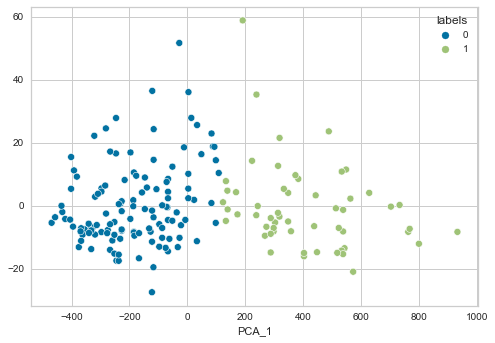

In [106]:
sns.scatterplot(x=X.PCA_1,y=PCA_2,hue=X.labels)